In [1]:
import numpy as np

from sklearn import tree, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import graphviz

# Decision trees

Example from `sklearn`

In [2]:
dataset = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=123)

In [3]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train);

In [4]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       244

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



### And what if we look at the accuracy over the test data?

In [5]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        75
           1       0.96      0.95      0.96       113

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



# Random Forest

In [6]:
from sklearn import ensemble

In [7]:
clf = ensemble.RandomForestClassifier(n_estimators=10, random_state=123)

clf.fit(X_train, y_train);

In [8]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.98      0.98      0.98       113

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [9]:
def draw_random_forest_tree(index):
    assert(len(clf.estimators_) > index)
    dot_data = tree.export_graphviz(clf.estimators_[index], out_file=None,
                                    feature_names=dataset.feature_names,
                                    class_names=dataset.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)

    return graphviz.Source(dot_data)

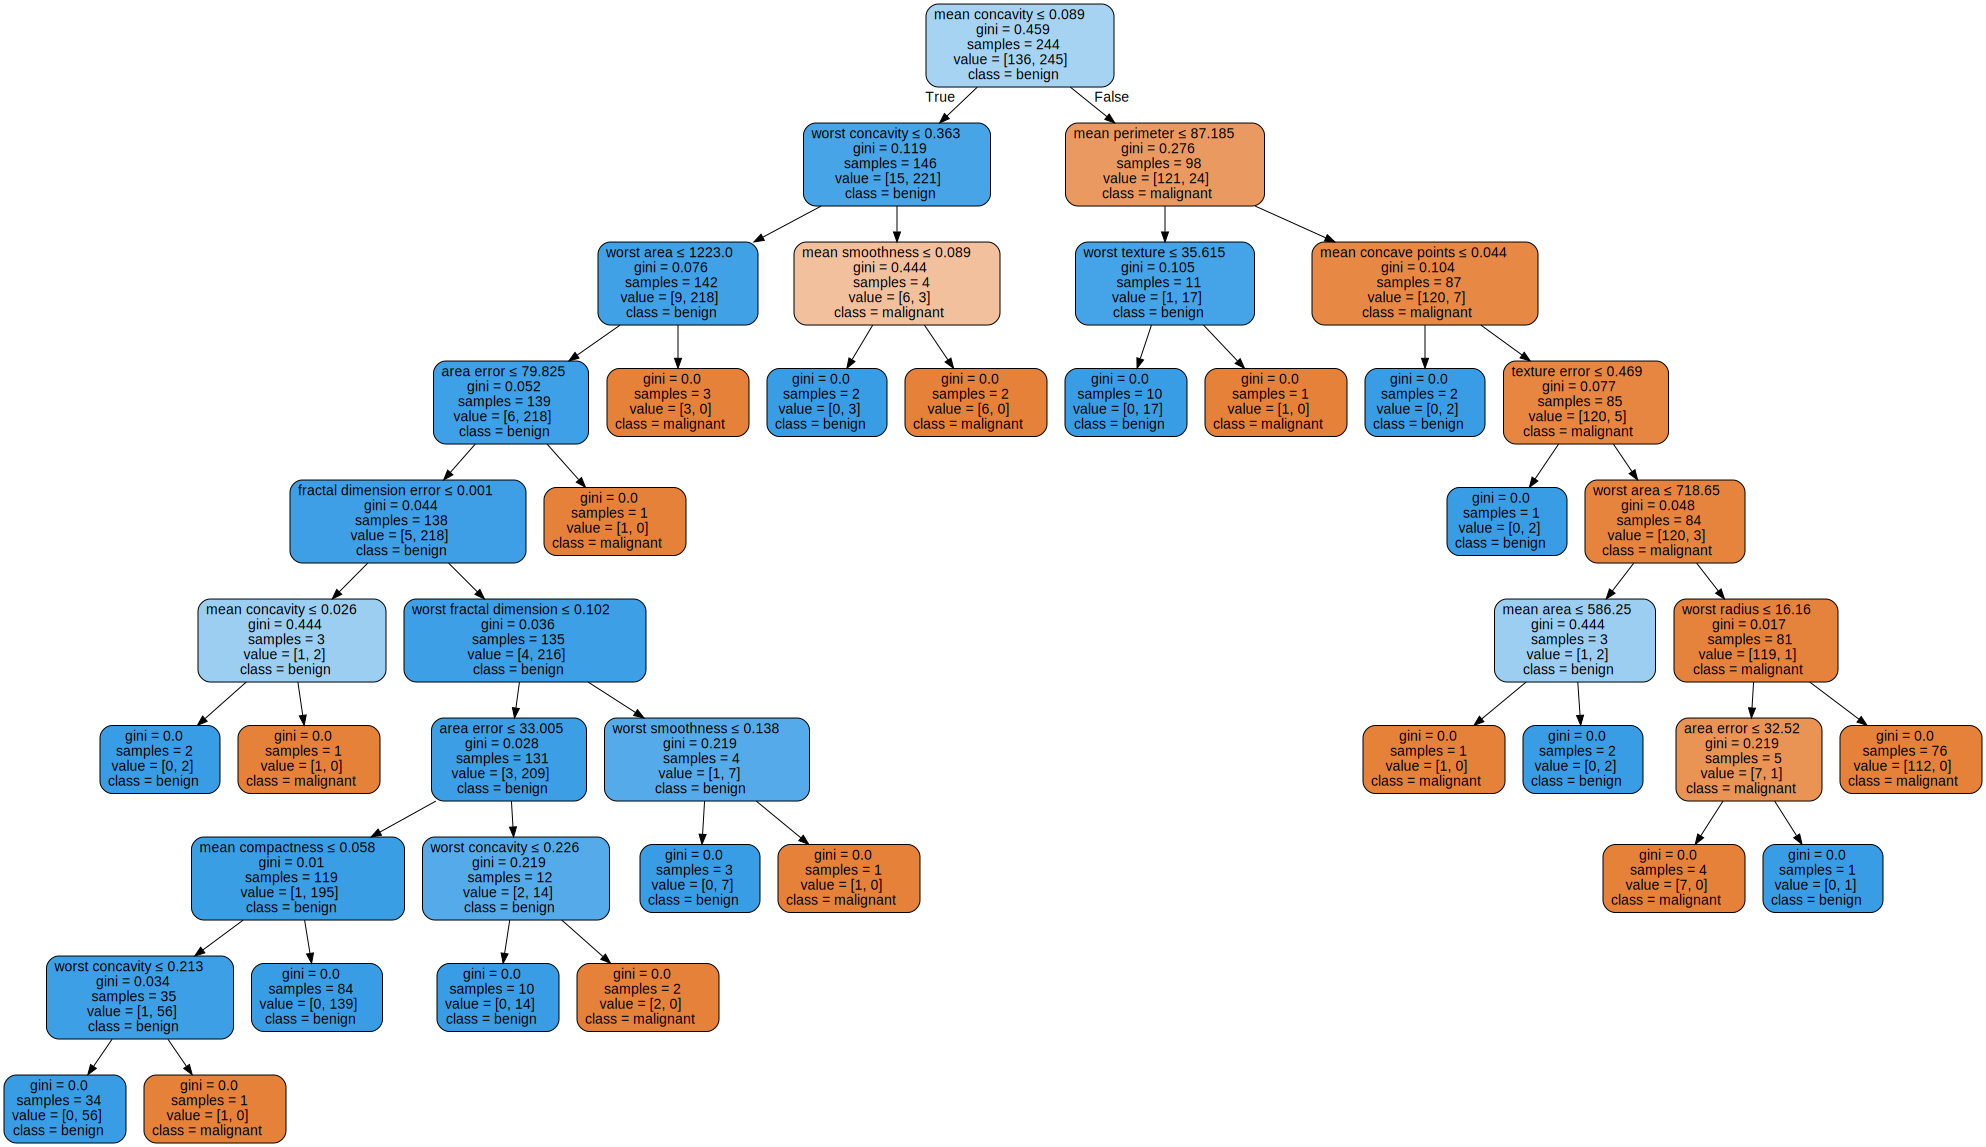

In [10]:
draw_random_forest_tree(1)

# An interesting example on how to use Random Forests: https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/data